In [6]:
from tensorflow.keras import models, optimizers, callbacks, Sequential
#import tensorflow_addons as tfa
import numpy as np
import time
from network_functions import *
from sklearn.model_selection import train_test_split
from data_generation_functions import generate_final_data

import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['figure.dpi']=150

In [7]:
data = np.load("data/Mar6_x32_noisy.npz")
c_data = data['c_in'] 
T_in = data['T_in']         # Time vector for data generation 
s_data = data['s_in'] 
w0 = data['w_in']           # Omega vector for data generation
T_train = data['T_train']      # Time vector for training data (based on the experimental data)
w_train = data['w_train']      # Omega vector for training data
print('-- data loaded')


#== format the data for the training stage
c_train, s_train = \
generate_final_data( c_data, T_in, s_data, w0, T_train, w_train )

x_train, x_test, y_train, y_test = train_test_split( c_train, s_train, test_size=0.15)

print('-- data split for training:')
print("  x_train = ",np.shape(x_train))
print("  y_train = ",np.shape(y_train))
print("  x_test = ",np.shape(x_test))
print("  y_test = ",np.shape(y_test))
print("  w0 = ",np.shape(w0))
print("  w_train = ",np.shape(w_train))

data_exp = np.load("experimental_data/24sept_q0q3.npz")

-- data loaded
-- data split for training:
  x_train =  (76505, 150)
  y_train =  (76505, 501)
  x_test =  (13501, 150)
  y_test =  (13501, 501)
  w0 =  (14002,)
  w_train =  (501,)


In [8]:
# Create the the main file path
data = np.load('experimental_data/T2_data_logspace.npz')
for val in data:
    print(val)
np.shape(data['pop_0'])

pop_0
counts_t2
xval


(21, 150)

In [9]:
# Normalise experimental decoherence data from 1 to 0
def normalise(data):
    c_data = (data-0.5)/0.5
    return c_data
exp_data = normalise(data['pop_0'])
norm_data = np.zeros(data['pop_0'].shape)
for i in range(data['pop_0'].shape[0]):
    norm_data[i,:] = exp_data[i,:]/exp_data[i,:3].mean()
print(np.shape(norm_data))

(21, 150)


In [13]:
paramchar = "9.42_fil=28_ker=5_dr0.05_ps=2_LRini=0.001_LRmin=1e-06_bs=64_ep=30"
model = models.load_model('RESULTS/MODEL_'+paramchar)
final_accuracy = 9.42
rand_set = np.random.randint( 0, 5000 ,(8,) )

# Testing model on test data

In [14]:
predictions_on_test = model.predict( x_test )

422/422 [==============================] - 1s 2ms/step


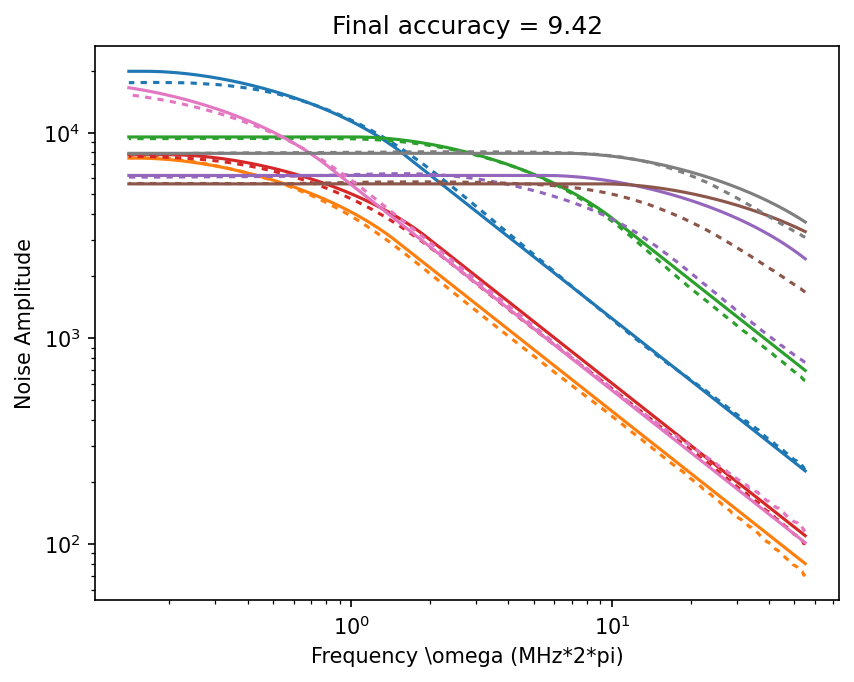

In [15]:
for i in range(len(rand_set)):
    plt.plot(w_train/1e6, y_test[ rand_set[i] ,:],color='C'+str(i))
    plt.plot(w_train/1e6, predictions_on_test[ rand_set[i] ],color='C'+str(i), dashes=[2,2,2,2])
plt.yscale('log')
plt.xscale('log')

plt.ylabel('Noise Amplitude')
plt.xlabel('Frequency \omega (MHz*2*pi)')
plt.title('Final accuracy = '+str(final_accuracy))
plt.show()

# Testing model on exprimental data

In [8]:
len(T_train)

147

In [7]:
T_train_2= np.linspace(T_train[0], T_train[-1], 150)
for i in range( 11, 20 ):
    plt.plot(T_train_2, exp_data[ i ,:],color='C'+str(i))
    plt.plot(T_train, x_train[i,:], color='C'+str(i))
plt.xlabel('Time')
plt.show()

NameError: name 'exp_data' is not defined

In [23]:
predictions_exp_data = model.predict( data_exp['ml_input'] )

1/1 [==============================] - 0s 86ms/step


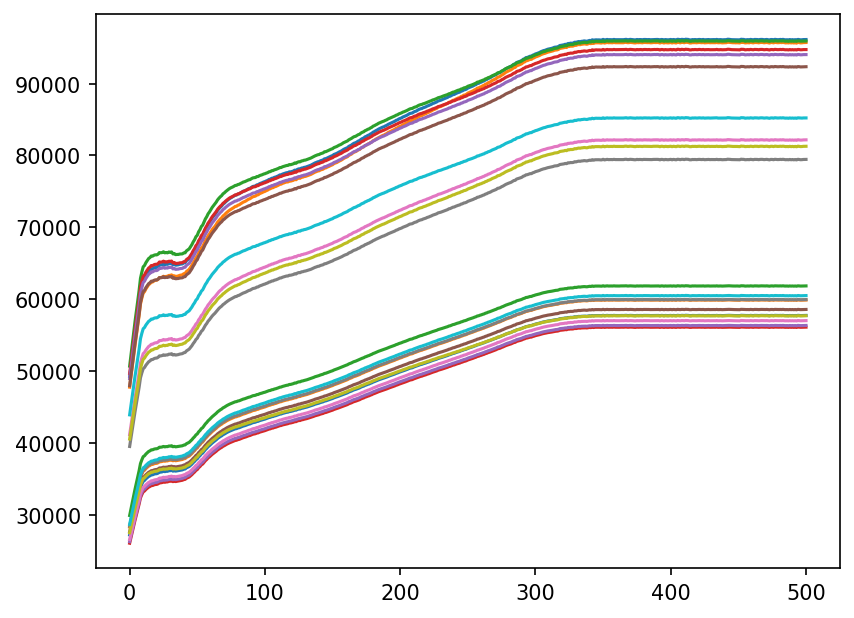

In [24]:
predictions_exp_data.shape[0]
for i in range( predictions_exp_data.shape[0] ):
    plt.plot(predictions_exp_data[ i ,:],color='C'+str(i))
plt.show()

In [30]:
rand_set_2 = np.random.randint( 0, predictions_exp_data.shape[0] ,(4,) )

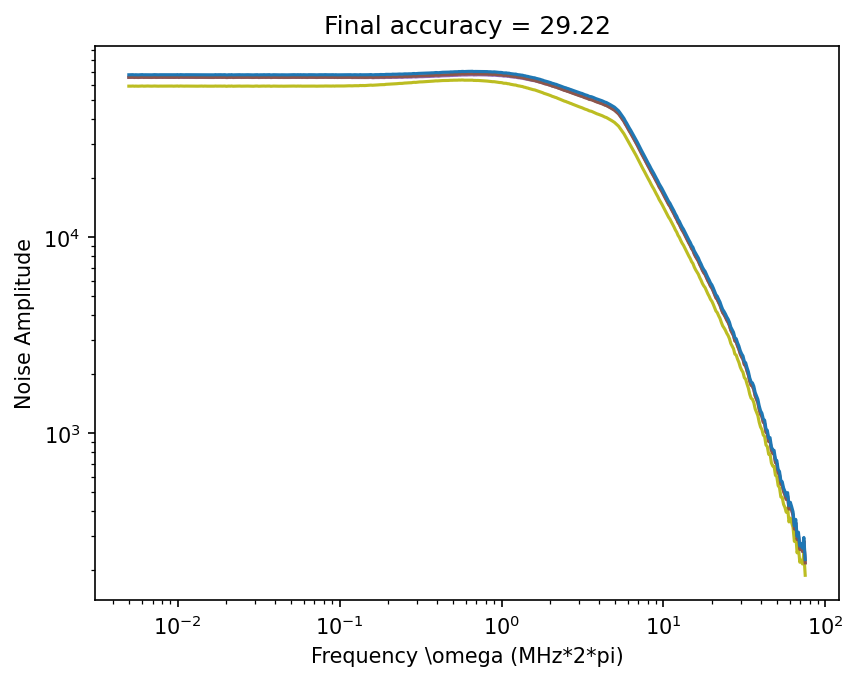

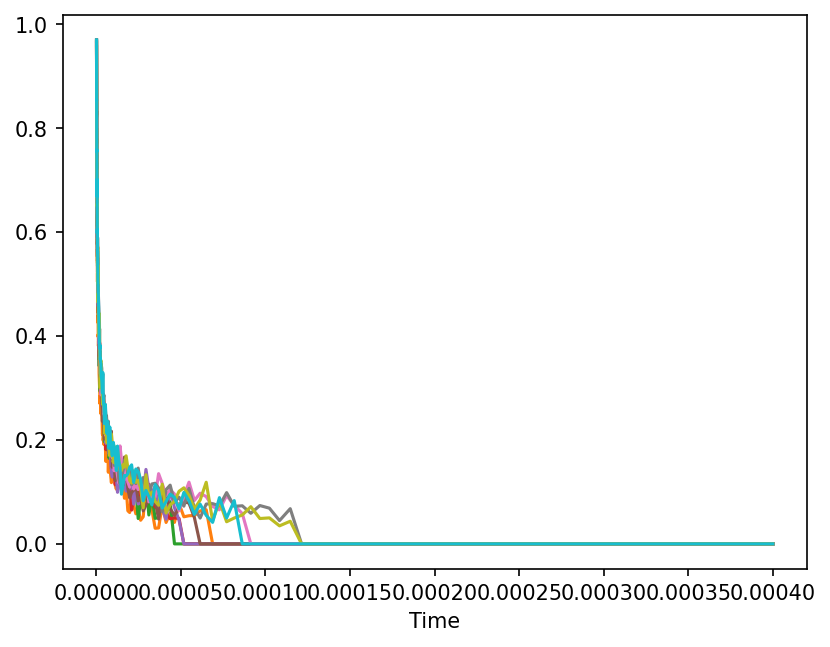

In [32]:
for i in rand_set_2:
    plt.plot(w_train/1e6, predictions_exp_data[ i ],color='C'+str(i))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Noise Amplitude')
plt.xlabel('Frequency \omega (MHz*2*pi)')
plt.title('Final accuracy = '+str(final_accuracy))
plt.show()

